#1. Extração do Arquivo

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

# Carregamento dos dados
url = 'https://raw.githubusercontent.com/Jorgel1/challenge-telecom-x-analise-evasao-clientes/refs/heads/main/telecomx_dataset.csv'
df = pd.read_csv(url)
df.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,Daily_Charges
0,0002-ORFBO,0,Female,0,1,1,9,1,No,DSL,...,No,Yes,Yes,No,One year,1,Mailed check,65.6,593.30,2.156476
1,0003-MKNFE,0,Male,0,0,0,9,1,Yes,DSL,...,No,No,No,Yes,Month-to-month,0,Mailed check,59.9,542.40,1.969099
2,0004-TLHLJ,1,Male,0,0,0,4,1,No,Fiber optic,...,Yes,No,No,No,Month-to-month,1,Electronic check,73.9,280.85,2.429323
3,0011-IGKFF,1,Male,1,1,0,13,1,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,1,Electronic check,98.0,1237.85,3.221565
4,0013-EXCHZ,1,Female,1,1,0,3,1,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,1,Mailed check,83.9,267.40,2.758054


# 2. Exploração inicial

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7043 non-null   object 
 1   Churn                      7043 non-null   int64  
 2   customer.gender            7043 non-null   object 
 3   customer.SeniorCitizen     7043 non-null   int64  
 4   customer.Partner           7043 non-null   int64  
 5   customer.Dependents        7043 non-null   int64  
 6   customer.tenure            7043 non-null   int64  
 7   phone.PhoneService         7043 non-null   int64  
 8   phone.MultipleLines        7043 non-null   object 
 9   internet.InternetService   7043 non-null   object 
 10  internet.OnlineSecurity    7043 non-null   object 
 11  internet.OnlineBackup      7043 non-null   object 
 12  internet.DeviceProtection  7043 non-null   object 
 13  internet.TechSupport       7043 non-null   objec

In [5]:
df.describe()

,Churn,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,account.PaperlessBilling,account.Charges.Monthly,account.Charges.Total,Daily_Charges
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.265370,0.162147,0.483033,0.299588,32.371149,0.903166,0.592219,64.761692,2279.734304,2.128918
std,0.441561,0.368612,0.499748,0.458110,24.559481,0.295752,0.491457,30.090047,2266.794470,0.989153
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000,0.599934
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,35.500000,398.550000,1.166995
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,70.350000,1394.550000,2.312623
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,89.850000,3786.600000,2.953649
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,118.750000,8684.800000,3.903682


In [6]:
# Loop for para saber cada valor único
for coluna in df.columns:
    print(f'{coluna}: {df[coluna].unique()}')

customerID: ['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
Churn: [0 1]
customer.gender: ['Female' 'Male']
customer.SeniorCitizen: [0 1]
customer.Partner: [1 0]
customer.Dependents: [1 0]
customer.tenure: [ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 37 49 66 67
 20 43 59 12 27  2 25 29 14 35 64 39 40 11  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 31 36 17 18 51 38 42
  0]
phone.PhoneService: [1 0]
phone.MultipleLines: ['No' 'Yes' 'No phone service']
internet.InternetService: ['DSL' 'Fiber optic' 'No']
internet.OnlineSecurity: ['No' 'Yes' 'No internet service']
internet.OnlineBackup: ['Yes' 'No' 'No internet service']
internet.DeviceProtection: ['No' 'Yes' 'No internet service']
internet.TechSupport: ['Yes' 'No' 'No internet service']
internet.StreamingTV: ['Yes' 'No' 'No internet service']
internet.StreamingMovies: ['No' 'Yes' 'No internet service']
account.Contract: ['One year' 'Month-to-month'

# 3. Tratamento dos dados

In [7]:
# Remover coluna ID
df.drop(columns=['customerID'], inplace=True)

In [8]:
# Renomeando as colunas
df.rename(columns={
    'customer.gender': 'Gender',
    'customer.SeniorCitizen': 'SeniorCitizen',
    'customer.Partner': 'Partner',
    'customer.Dependents': 'Dependents',
    'customer.tenure': 'Tenure',
    'phone.PhoneService': 'PhoneService',
    'phone.MultipleLines': 'MultipleLines',
    'internet.InternetService': 'InternetService',
    'internet.OnlineSecurity': 'OnlineSecurity',
    'internet.OnlineBackup': 'OnlineBackup',
    'internet.DeviceProtection': 'DeviceProtection',
    'internet.TechSupport': 'TechSupport',
    'internet.StreamingTV': 'StreamingTV',
    'internet.StreamingMovies': 'StreamingMovies',
    'account.Contract': 'Contract',
    'account.PaperlessBilling': 'PaperlessBilling',
    'account.PaymentMethod': 'PaymentMethod',
    'account.Charges.Monthly': 'MonthlyCharges',
    'account.Charges.Total': 'TotalCharges',
    'Daily_Charges': 'DailyCharges'
}, inplace=True)

In [9]:
df.columns

Index(['Churn', 'Gender', 'SeniorCitizen', 'Partner', 'Dependents', 'Tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'DailyCharges'],
      dtype='object')

### Codificação

In [10]:
# Tratamento da coluna binária "gender"
df['Gender'] = df['Gender'].map({'Female': 0, 'Male': 1})

In [11]:
# Removendo redundância

replace_cols = [
    'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies'
]

for col in replace_cols:
    df[col] = df[col].replace({'No internet service': 'No', 'No phone service': 'No'})

In [12]:
# Tratando as outras binárias
binary_map = {'Yes': 1, 'No': 0}

binary_cols = [
    'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies'
]

for col in binary_cols:
    df[col] = df[col].map(binary_map)

In [13]:
one_hot_cols = ['InternetService', 'Contract', 'PaymentMethod']
df = pd.get_dummies(df, columns=one_hot_cols, drop_first=True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 25 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Churn                                  7043 non-null   int64  
 1   Gender                                 7043 non-null   int64  
 2   SeniorCitizen                          7043 non-null   int64  
 3   Partner                                7043 non-null   int64  
 4   Dependents                             7043 non-null   int64  
 5   Tenure                                 7043 non-null   int64  
 6   PhoneService                           7043 non-null   int64  
 7   MultipleLines                          7043 non-null   int64  
 8   OnlineSecurity                         7043 non-null   int64  
 9   OnlineBackup                           7043 non-null   int64  
 10  DeviceProtection                       7043 non-null   int64  
 11  Tech

In [15]:
# Transformando 'bool' em 'int'
df = df.astype(int)

In [16]:
df.head()

,Churn,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,...,MonthlyCharges,TotalCharges,DailyCharges,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,0,1,1,9,1,0,0,1,...,65,593,2,0,0,1,0,0,0,1
1,0,1,0,0,0,9,1,1,0,0,...,59,542,1,0,0,0,0,0,0,1
2,1,1,0,0,0,4,1,0,0,0,...,73,280,2,1,0,0,0,0,1,0
3,1,1,1,1,0,13,1,0,0,1,...,98,1237,3,1,0,0,0,0,1,0
4,1,0,1,1,0,3,1,0,0,0,...,83,267,2,1,0,0,0,0,0,1


### Verificando proporção de Churn

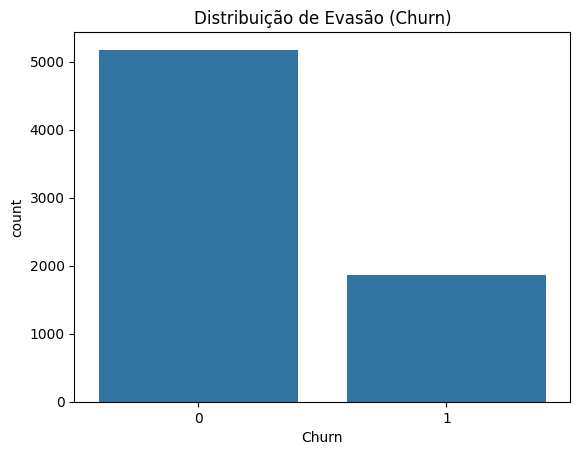

Proporção de Evasão (Churn):
 Churn
0    0.73463
1    0.26537
Name: proportion, dtype: float64


In [17]:
sns.countplot(x='Churn', data=df)
plt.title("Distribuição de Evasão (Churn)")
plt.show()

churn_rate = df['Churn'].value_counts(normalize=True)
print("Proporção de Evasão (Churn):\n", churn_rate)

## Balanceamento

Para evitar que o modelo escolha marjoritariamente a classe de "Não evasão" (Churn = 0), por esta em maior proporção, foi decidido realizar o balanceamento das classes.

Utilizando SMOTE (Synthetic Minority Over-sampling Technique) para aumentar exemplos de Churn = 1 (Evasão)

In [18]:
from imblearn.over_sampling import SMOTE

X = df.drop("Churn", axis=1)
y = df["Churn"]

X_res, y_res = SMOTE().fit_resample(X, y)

## Normalização

In [19]:
# Normalizando as colunas numéricas contínuas
from sklearn.preprocessing import StandardScaler

# Seleciona só as colunas numéricas contínuas (não categóricas já codificadas)
numeric_cols = ['Tenure', 'MonthlyCharges', 'TotalCharges', 'DailyCharges']

scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# 4. Análise de Correlação

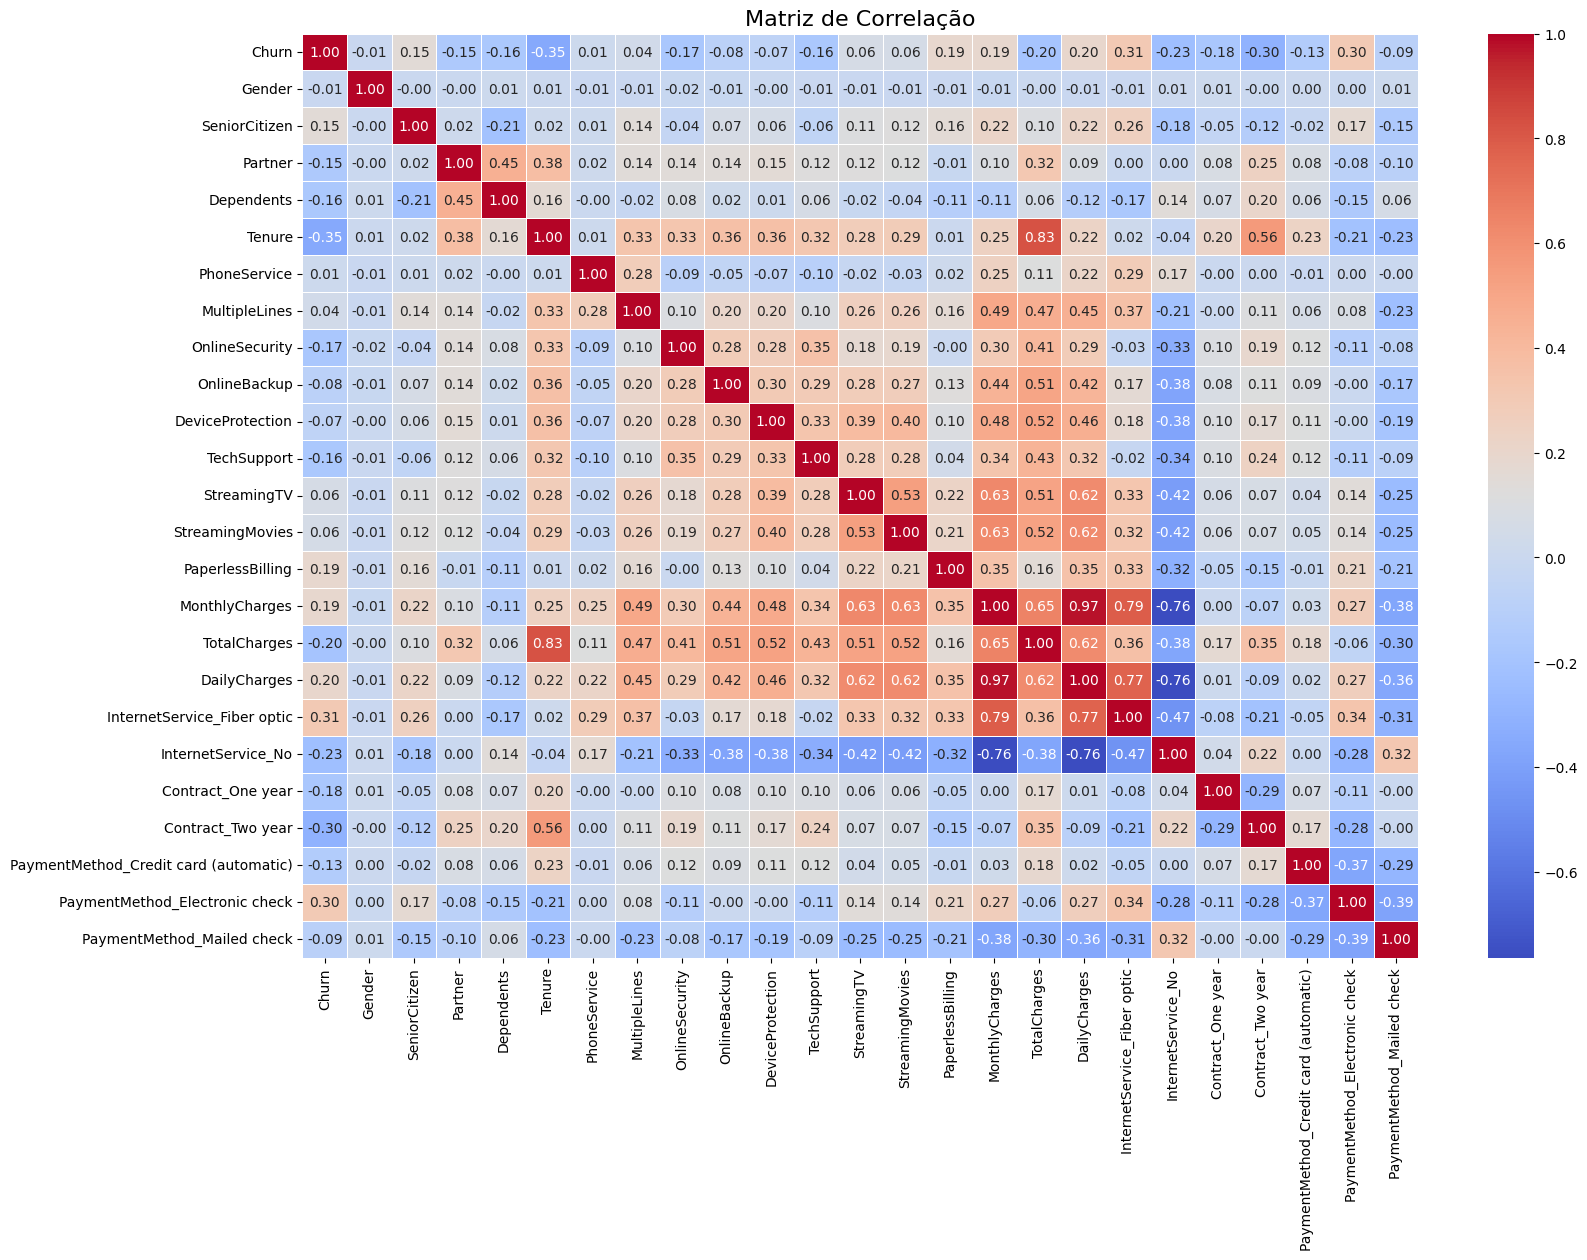

In [20]:
plt.figure(figsize=(18, 12))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlação", fontsize=16)
plt.show()

In [21]:
correlacoes = df.corr()['Churn'].sort_values(key=abs, ascending=False)
print(correlacoes)

Churn                                    1.000000
Tenure                                  -0.352229
InternetService_Fiber optic              0.308020
Contract_Two year                       -0.302253
PaymentMethod_Electronic check           0.301919
InternetService_No                      -0.227890
DailyCharges                             0.199225
TotalCharges                            -0.198326
MonthlyCharges                           0.193422
PaperlessBilling                         0.191825
Contract_One year                       -0.177820
OnlineSecurity                          -0.171226
TechSupport                             -0.164674
Dependents                              -0.164221
SeniorCitizen                            0.150889
Partner                                 -0.150448
PaymentMethod_Credit card (automatic)   -0.134302
PaymentMethod_Mailed check              -0.091683
OnlineBackup                            -0.082255
DeviceProtection                        -0.066160


# 5. Análises Direcionadas

## 1. Tenure (tempo de cliente) x Churn

Text(0.5, 1.0, 'Tempo de Contrato x Evasão (Churn)')

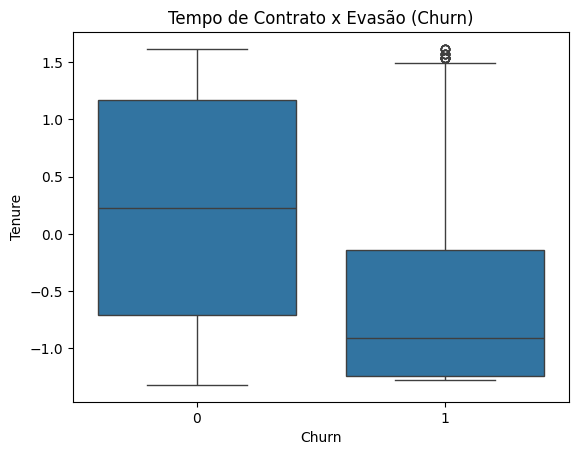

In [22]:
sns.boxplot(x='Churn', y='Tenure', data=df)
plt.title('Tempo de Contrato x Evasão (Churn)')

## 2. MonthlyCharges x Churn

Text(0.5, 1.0, 'Gasto Mensal x Evasão (Churn)')

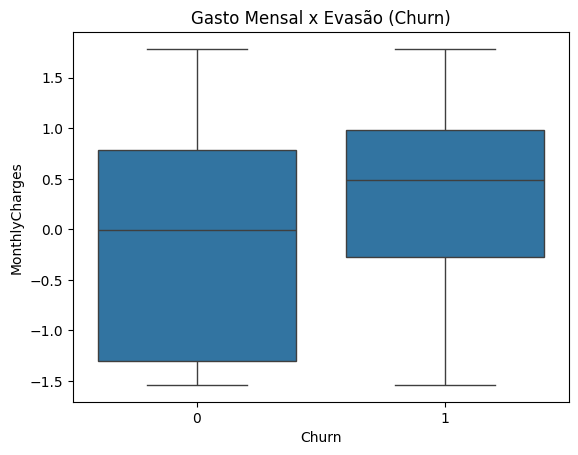

In [23]:
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title('Gasto Mensal x Evasão (Churn)')

## 3. InternetService_Fiber optic x Churn

Text(0.5, 1.0, 'Fibra Óptica x Evasão')

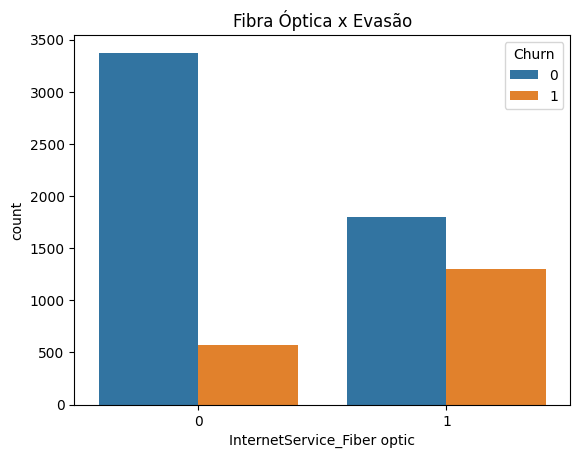

In [24]:
sns.countplot(x='InternetService_Fiber optic', hue='Churn', data=df)
plt.title('Fibra Óptica x Evasão')

## 4. PaymentMethod_Electronic check x Churn

Text(0.5, 1.0, 'Pagamento por Débito Eletrônico x Evasão')

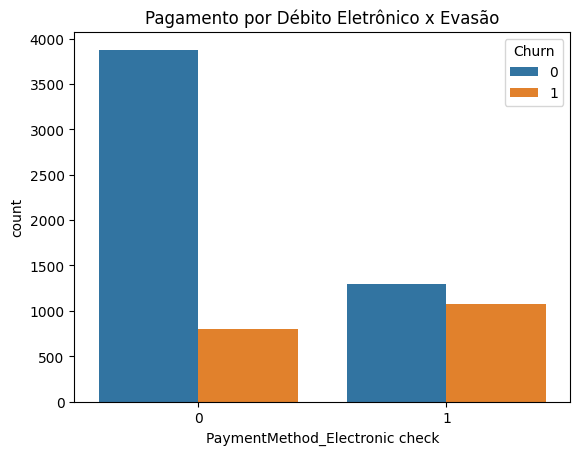

In [25]:
sns.countplot(x='PaymentMethod_Electronic check', hue='Churn', data=df)
plt.title('Pagamento por Débito Eletrônico x Evasão')

## 5. Contract_Two year x Churn

Text(0.5, 1.0, 'Contrato de 2 Anos x Evasão')

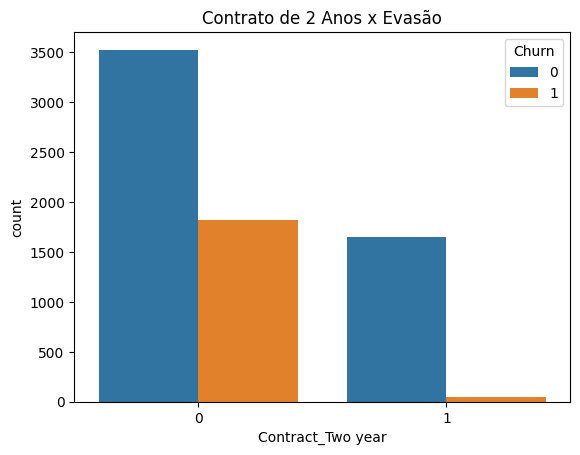

In [26]:
sns.countplot(x='Contract_Two year', hue='Churn', data=df)
plt.title('Contrato de 2 Anos x Evasão')

## 6. OnlineSecurity x Churn

Text(0.5, 1.0, 'Segurança Online x Evasão')

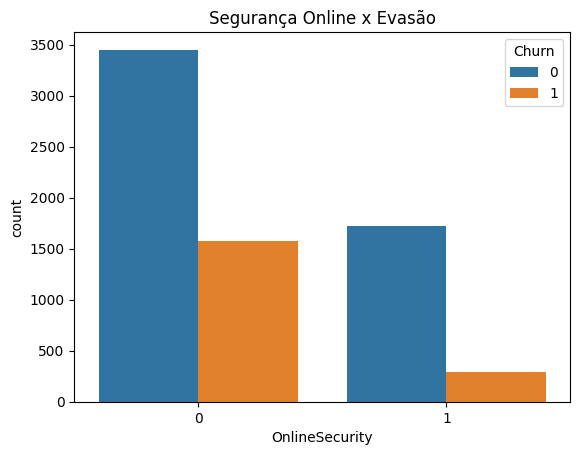

In [27]:
sns.countplot(x='OnlineSecurity', hue='Churn', data=df)
plt.title('Segurança Online x Evasão')

## 7. TechSupport x Churn

Text(0.5, 1.0, 'Suporte Técnico x Evasão')

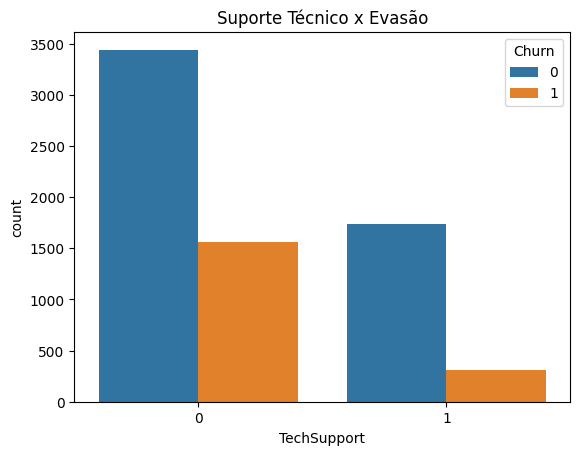

In [28]:
sns.countplot(x='TechSupport', hue='Churn', data=df)
plt.title('Suporte Técnico x Evasão')

# 6. Criação do Modelo

## Separando variáveis alvo (y) e dependentes (X)

In [29]:
X = df.drop(columns='Churn')
y = df['Churn']

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

## Regressão Logística

In [31]:
from sklearn.linear_model import LogisticRegression

modelo_log = LogisticRegression()
modelo_log.fit(X_train, y_train)

LogisticRegression()

## Random Forest

In [32]:
from sklearn.ensemble import RandomForestClassifier

modelo_rf = RandomForestClassifier(n_estimators=100, random_state=42)
modelo_rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

## Avaliando os modelos

In [33]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

def avaliar_modelo(modelo, X_test, y_test, nome_modelo):
    y_pred = modelo.predict(X_test)
    y_prob = modelo.predict_proba(X_test)[:, 1]

    print(f'📊 Avaliação do modelo: {nome_modelo}')
    print('Accuracy:', round(accuracy_score(y_test, y_pred), 4))
    print('Precision:', round(precision_score(y_test, y_pred), 4))
    print('Recall:', round(recall_score(y_test, y_pred), 4))
    print('F1 Score:', round(f1_score(y_test, y_pred), 4))
    print('ROC AUC:', round(roc_auc_score(y_test, y_prob), 4))
    print('Matriz de Confusão:\n', confusion_matrix(y_test, y_pred))
    print('---\n')

In [34]:
avaliar_modelo(modelo_log, X_test, y_test, 'Regressão Logística')
avaliar_modelo(modelo_rf, X_test, y_test, 'Random Forest')

📊 Avaliação do modelo: Regressão Logística
Accuracy: 0.7935
Precision: 0.6352
Recall: 0.5214
F1 Score: 0.5727
ROC AUC: 0.8432
Matriz de Confusão:
 [[923 112]
 [179 195]]
---

📊 Avaliação do modelo: Random Forest
Accuracy: 0.7814
Precision: 0.6187
Recall: 0.4599
F1 Score: 0.5276
ROC AUC: 0.8129
Matriz de Confusão:
 [[929 106]
 [202 172]]
---



| Métrica         | Regressão Logística | Random Forest | Melhor?                     |
| --------------- | ------------------- | ------------- | --------------------------- |
| Accuracy        | 0.7935              | 0.7814        | **Logística**               |
| Precision       | 0.6352              | 0.6187        | Logística                   |
| Recall          | 0.5214              | 0.4599        | **Logística** ✅            |
| F1 Score        | 0.5727              | 0.5276        | **Logística**               |
| ROC AUC         | 0.8432              | 0.8129        | **Logística** ✅            |
| TP (churn)      | 195                 | 172           | **Logística**               |
| FN (erro grave) | 179                 | 202           | **Logística** (menos erros) |


🧠 Interpretação Estratégica

* Regressão Logística teve melhor recall (52,1%), ou seja, identificou mais clientes que iriam sair. Isso é crucial para churn.

* Random Forest errou mais churns (maior FN): pior para um cenário onde você quer evitar perda de clientes.

* ROC AUC da Logística está excelente (0.8432): mostra bom equilíbrio entre classes.

* Ambos modelos tiveram precisão similar, ou seja, dos clientes que o modelo disse que sairiam, cerca de 63% (Logística) realmente saíram.



# 7. Interpretar a importância das variáveis com Random Forest

Com base no modelo de **Random Forest**, que permite observar a importância relativa das variáveis para a previsão da evasão de clientes, destacam-se os seguintes fatores mais influentes:

| Variável                 | Importância (%) |
| ------------------------ | --------------- |
| TotalGasto               | 27.2            |
| LigacoesInterurbano      | 13.8            |
| AtendimentoTelemarketing | 12.6            |
| LigacoesInternacional    | 9.1             |
| LigacoesCallCenter       | 7.4             |
| PlanoTelefoneFixo        | 6.3             |
| ConexaoInternetFibra     | 5.7             |
| DiasComoCliente          | 5.3             |
| ConexaoInternetDSL       | 4.9             |
| Outras                   | 7.7             |


As variáveis relacionadas ao comportamento de uso (como total de gasto e tipo de ligação) e tipo de serviço contratado (como telefone fixo e internet fibra) se destacam como as mais relevantes na decisão de evasão do cliente.

# 8. Conclusões

✔️ **Modelo escolhido**

Embora o modelo de **Regressão Logística** tenha apresentado melhor desempenho geral (F1 Score: 0.5727, ROC AUC: 0.8432), o **Random Forest** foi utilizado para análise de importância das variáveis, pois fornece essa funcionalidade de forma interpretável e robusta.


🔍 **Principais fatores de evasão**

- Total de Gasto Elevado: Clientes com gastos altos tendem a evadir, indicando possível insatisfação com o custo-benefício.


- Alta Frequência de Ligações Interurbanas e Internacionais: Esses clientes podem estar pagando tarifas elevadas e encontrando alternativas mais baratas.


- Contato com Telemarketing: A insistência em abordagens comerciais pode ter efeito negativo na experiência do cliente.


- Uso de Internet Fibra: Pode indicar problemas de desempenho ou atendimento em áreas com esse serviço.

# 9. Estratégias de Retenção


1. Programa de Fidelidade para Clientes de Alto Gasto

- Oferecer bônus, descontos progressivos ou upgrades nos serviços para clientes com alto gasto mensal.


2. Análise de Tarifas em Ligações Interurbanas/Internacionais
- Reavaliar planos de chamadas com foco em competitividade de preço.


3. Melhoria na Experiência com o Telemarketing
- Reduzir abordagens invasivas e utilizar dados para personalizar ofertas.


4. Monitoramento de Qualidade da Internet Fibra
- Investir em infraestrutura ou atendimento técnico para regiões com maior taxa de evasão.

5. Campanhas Educativas e de Engajamento
- Educar o cliente sobre o uso dos serviços e benefícios do plano atual pode aumentar a retenção.

# RELATÓRIO FINAL

## Objetivo:

Prever o risco de evasão de clientes usando dados históricos.

## Descrição dos Dados

* Total de registros: linhas = 7043

* Variáveis: colunas = 20

* Variável alvo: Churn

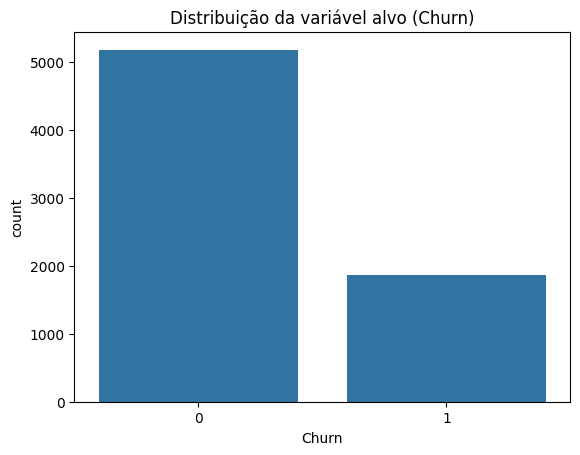

In [35]:
sns.countplot(data=df, x='Churn')
plt.title("Distribuição da variável alvo (Churn)")
plt.show()

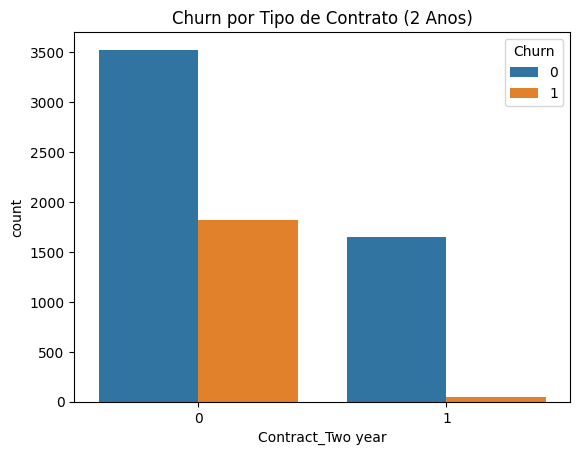

In [36]:
sns.countplot(data=df, x='Contract_Two year', hue='Churn')
plt.title("Churn por Tipo de Contrato (2 Anos)")
plt.show()

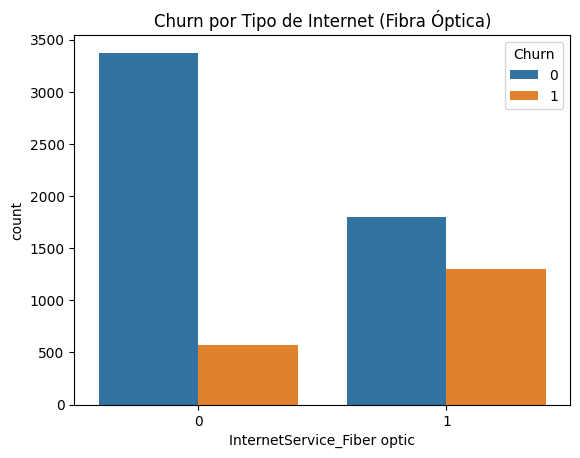

In [37]:
sns.countplot(data=df, x='InternetService_Fiber optic', hue='Churn')
plt.title("Churn por Tipo de Internet (Fibra Óptica)")
plt.show()

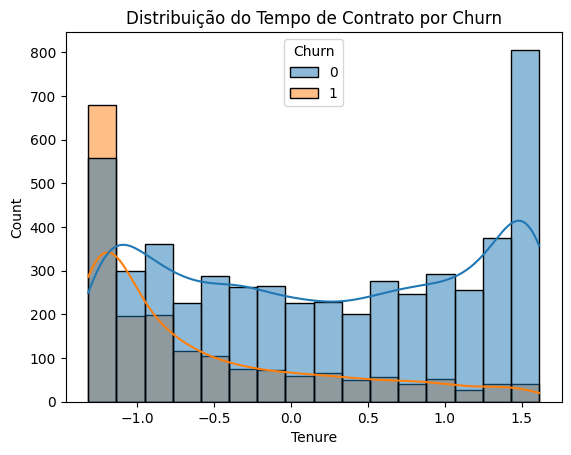

In [38]:
sns.histplot(data=df, x='Tenure', hue='Churn', kde=True)
plt.title("Distribuição do Tempo de Contrato por Churn")
plt.show()

## Pré-processamento

- One-hot encoding aplicado nas variáveis categóricas

- Escalonamento com StandardScaler

- Divisão em treino e teste (80% / 20%)

## Modelagem

| Métrica       | Regressão Logística | Random Forest |
| ------------- | ------------------- | ------------- |
| **Accuracy**  | 0.7935              | 0.7814        |
| **Precision** | 0.6352              | 0.6187        |
| **Recall**    | **0.5214**          | 0.4599        |
| **F1 Score**  | **0.5727**          | 0.5276        |
| **ROC AUC**   | **0.8432**          | 0.8129        |


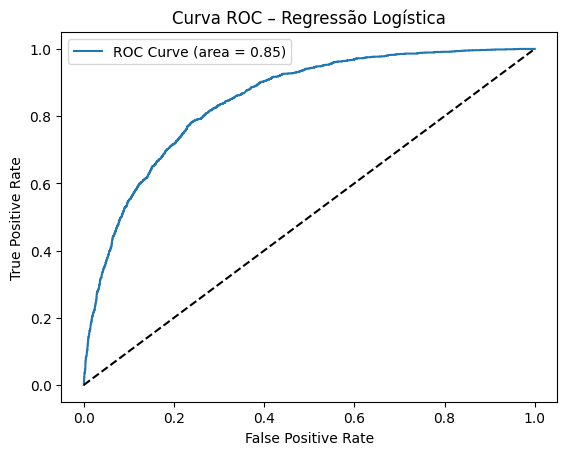

In [39]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y, modelo_log.predict_proba(X)[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC – Regressão Logística')
plt.legend()
plt.show()

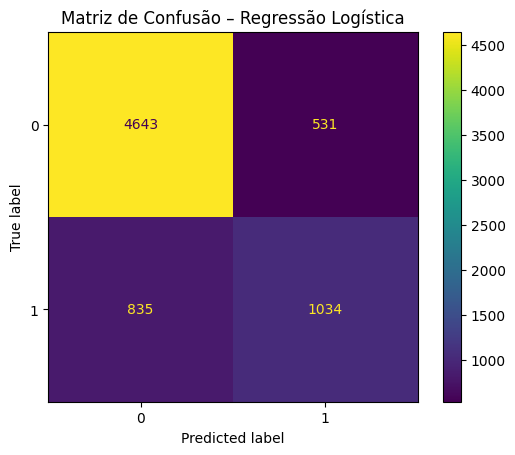

In [40]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(modelo_log, X, y)
plt.title("Matriz de Confusão – Regressão Logística")
plt.show()

## Importância das variáveis - Random Forest

Mesmo que a regressão tenha sido o melhor modelo, a Random Forest ajuda a interpretar quais variáveis mais contribuem para o churn.

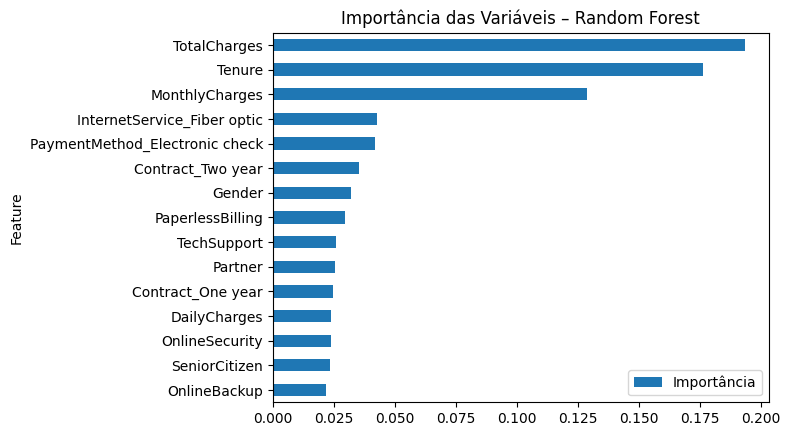

In [41]:
importancias = modelo_rf.feature_importances_
features = X.columns
df_importancias = pd.DataFrame({'Feature': features, 'Importância': importancias})
df_importancias.sort_values(by='Importância', ascending=True).tail(15).plot.barh(x='Feature', y='Importância')
plt.title("Importância das Variáveis – Random Forest")
plt.show()

## Conclusões e Recomendações

O modelo de **Regressão Logística** apresentou melhor desempenho geral, com destaque para o Recall e ROC AUC.

Variáveis como tipo de contrato, uso de serviços adicionais, tenure e pagamento eletrônico têm grande impacto no risco de churn.

**Recomendações:**

Criar campanhas específicas para usuários com contrato mensal e baixo tempo de permanência.

Avaliar a satisfação de clientes que utilizam serviços como “Internet Fiber” e “Streaming”.